In [3]:
%matplotlib inline
import pandas
traindata = pandas.read_csv("Training Data.csv")
testdata = pandas.read_csv("Test Data.csv")

In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model

In [5]:
traindata["Donation per Month"] = traindata['Number of Donations']/(traindata['Months since First Donation']-traindata['Months since Last Donation']+1)

In [6]:
traindata["Consistency"] = (traindata['Months since Last Donation']+1)/traindata['Months since First Donation']

In [7]:
traindata.head()

,ID,Months since Last Donation,Number of Donations,Months since First Donation,Donation per Month,Month per Donation,Made Donation in March 2007,Consistency
0,619,2,50,98,0.515464,1.940000,1,0.030612
1,664,0,13,28,0.448276,2.230769,1,0.035714
2,441,1,16,35,0.457143,2.187500,1,0.057143
3,160,2,20,45,0.454545,2.200000,1,0.066667
4,358,1,24,77,0.311688,3.208333,0,0.025974


In [8]:
testdata["Donation per Month"] = testdata['Number of Donations']/(testdata['Months since First Donation']-testdata['Months since Last Donation']+1)

In [9]:
testdata["Consistency"] = (testdata['Months since Last Donation']+1)/testdata['Months since First Donation']

In [10]:
testdata.head()

,ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,KNprobs,GBprobs,RFprobs,Prediction,Donation per Month,Consistency
0,659,2,12,3000,52,0.333333,0.695496,0.649862,NaN,0.235294,0.057692
1,276,21,7,1750,38,0.000000,0.074129,0.056667,NaN,0.388889,0.578947
2,263,4,1,250,4,0.333333,0.155031,0.097526,NaN,1.000000,1.250000
3,303,11,11,2750,38,0.000000,0.080546,0.070000,NaN,0.392857,0.315789
4,83,4,12,3000,34,0.333333,0.393935,0.575667,NaN,0.387097,0.147059


In [11]:
X_train = traindata[['Months since Last Donation','Number of Donations','Months since First Donation','Donation per Month','Consistency']]
#X_train = traindata[['Donation per Month']]
Y_train = traindata['Made Donation in March 2007']
X_test = testdata[['Months since Last Donation','Number of Donations','Months since First Donation','Donation per Month','Consistency']]
Y_test = testdata['Prediction']

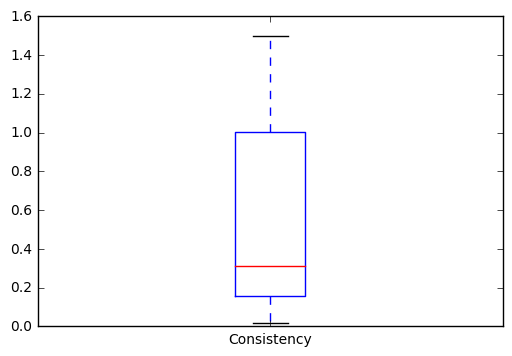

In [12]:
cons=traindata['Consistency']
cons.plot.box()

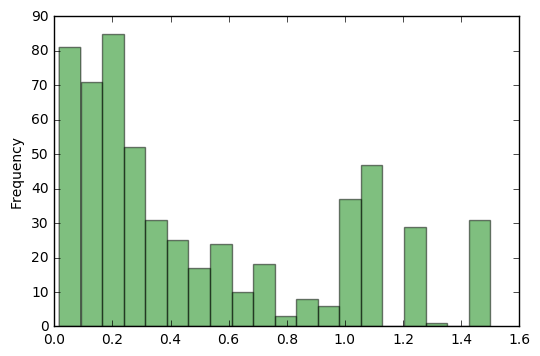

In [13]:
cons.plot.hist(color='g',alpha=0.5,bins=20)

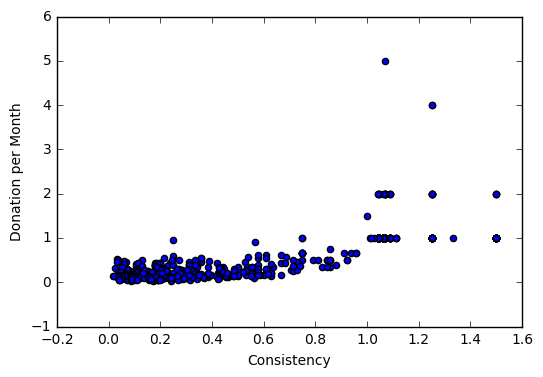

In [14]:
traindata.plot.scatter(x="Consistency",y="Donation per Month")

In [15]:
X_train = X_train.as_matrix().astype(np.float)
X_test = X_test.as_matrix().astype(np.float)
Y_train = Y_train.as_matrix().astype(np.float)
Y_test = Y_test.as_matrix().astype(np.float)

Logistic Regression

In [16]:
LRmodel = linear_model.LogisticRegression()
LRmodel = LRmodel.fit(X_train, Y_train)
LRmodel.score(X_train, Y_train)

0.78472222222222221

Random Forest 

In [17]:
import sklearn.ensemble as sk
rfc = sk.RandomForestClassifier(n_estimators=500, oob_score=True)
RFmodel = rfc.fit(X_train, Y_train)
RFmodel.score(X_train, Y_train)

0.9375

K-Nearest neighbors

In [18]:
from sklearn import neighbors
KNmodel = neighbors.KNeighborsClassifier(n_neighbors=3)
KNmodel = KNmodel.fit(X_train, Y_train)
KNmodel.score(X_train, Y_train)

0.83854166666666663

In [27]:
GBmodel = sk.GradientBoostingClassifier()
GBmodel = GBmodel.fit(X_train,Y_train)
GBmodel.score(X_train, Y_train)

0.88194444444444442

In [36]:
from sklearn.linear_model import Ridge
RDmodel = Ridge()
RDmodel = RDmodel.fit(X_train, Y_train)
RDmodel.score(X_train, Y_train)

0.14130099726696188

In [35]:
import pandas as pd
import numpy as np
LRpredict_t = LRmodel.predict_proba(X_train)
LRsolution_t = pd.DataFrame(traindata['ID'])
LRnp_values_t = np.array(LRpredict_t,dtype = np.float)
LRsolution_t['LRprobs'] = LRnp_values_t[:,1]
LRsolution_t.to_csv("LRoutput_t.csv",index=False)
##random forest
RFpredict_t = RFmodel.predict_proba(X_train)
RFsolution_t = pd.DataFrame(traindata['ID'])
RFnp_values_t = np.array(RFpredict_t,dtype = np.float)
RFsolution_t['RFprobs'] = RFnp_values_t[:,1]
RFsolution_t.to_csv("RFoutput_t.csv",index=False)
##Nearest Neighbor
KNpredict_t = KNmodel.predict_proba(X_train)
KNsolution_t = pd.DataFrame(traindata['ID'])
KNnp_values_t = np.array(KNpredict_t,dtype = np.float)
KNsolution_t['KNprobs'] = KNnp_values_t[:,1]
KNsolution_t.to_csv("KNoutput_t.csv",index=False)
##Gradient Boosting
GBpredict_t = GBmodel.predict_proba(X_train)
GBsolution_t = pd.DataFrame(traindata['ID'])
GBnp_values_t = np.array(GBpredict_t,dtype = np.float)
GBsolution_t['GBprobs'] = GBnp_values_t[:,1]
GBsolution_t.to_csv("GBoutput_t.csv",index=False)
##Ridge
RDpredict_t = RDmodel.predict_proba(X_train)
RDsolution_t = pd.DataFrame(traindata['ID'])
RDnp_values_t = np.array(RDpredict_t,dtype = np.float)
RDsolution_t['RDprobs'] = RDnp_values_t[:,1]
RDsolution_t.to_csv("RDoutput_t.csv",index=False)

AttributeError: 'Ridge' object has no attribute 'predict_proba'

In [19]:
import pandas as pd
import numpy as np
LRpredict = LRmodel.predict_proba(X_test)
LRsolution = pd.DataFrame(testdata['ID'])
LRnp_values = np.array(LRpredict,dtype = np.float)
LRsolution['LRprobs'] = LRnp_values[:,1]
LRsolution.to_csv("LRoutput2.csv",index=False)
##random forest
RFpredict = RFmodel.predict_proba(X_test)
RFsolution = pd.DataFrame(testdata['ID'])
RFnp_values = np.array(RFpredict,dtype = np.float)
RFsolution['RFprobs'] = RFnp_values[:,1]
RFsolution.to_csv("RFoutput2.csv",index=False)
##Nearest Neighbor
KNpredict = KNmodel.predict_proba(X_test)
KNsolution = pd.DataFrame(testdata['ID'])
KNnp_values = np.array(KNpredict,dtype = np.float)
KNsolution['KNprobs'] = KNnp_values[:,1]
KNsolution.to_csv("KNoutput2.csv",index=False)
##Gradient Boosting
GBpredict = GBmodel.predict_proba(X_test)
GBsolution = pd.DataFrame(testdata['ID'])
GBnp_values = np.array(GBpredict,dtype = np.float)
GBsolution['GBprobs'] = GBnp_values[:,1]
GBsolution.to_csv("GBoutput1.csv",index=False)

Log losses:

In [20]:
#LR:0.48318
LRtest = LRmodel.predict_proba(X_train)
metrics.log_loss(Y_train, LRtest)

0.47377419419647254

In [21]:
#RF:20679
RFtest = RFmodel.predict_proba(X_train)
metrics.log_loss(Y_train, RFtest)

0.20677442006457708

In [22]:
#KN:0.48068
KNtest = KNmodel.predict_proba(X_train)
metrics.log_loss(Y_train, KNtest)

0.48599873405125293

In [23]:
##GB:
GBtest = GBmodel.predict_proba(X_train)
metrics.log_loss(Y_train, GBtest)

0.30916282059467182